# Consumo de cigarro e álcool 
---

# Resumo

O impacto que drogas lícitas e ilícita tem sobre a sociedade afeta a vida de todos os cidadãos, seja do ponto de vista de segurança pública quanto do ponto da saúde pública. Neste breve estudo cuja análise se concentra em entender a experimentação/consumo de cigarro e álcool entre adolescentes foi encontrado que a idade em que os alunos informaram já ter consumido cigarro é independente do sexo e também que a quantidade de alunos que já consumiram álcool é maior do que a quantidade de adolescentes que consomem já consumiram as duas drogas.

---

# Pontos Principais

* Correlação entre variáveis

* Hipóteses a respeito das amostras

* Diferenças entre sexo e idade dentro os alunos que já consumiram cigarro

* Diferenças de idade dentre os alunos que já consumiram apenas álcool e álcool + cigarro

---

# Importações de módulos, dados e pre processamento


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from unidecode import unidecode

from matplotlib import pyplot as plt

sns.set_style('whitegrid')
sns.set_context("talk")

## Informações sobre a base de dados

### PeNSE (Pesquisa Nacional de Saúde do Escolar)

A pesquisa PeNSE é uma pesquisa feita por amostragem que permite conhecer e dimensionar os fatores de risco e proteção à saúde dos adolescente , é feita utilizando dados para a seleção de escolas publicas e privadas do Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira - INEP.

É fruto de uma parceria entre os Ministérios da Saúde e Educação. A pesquisa fornece informações sobre características básicas da população de estudo, incluindo aspectos socioecnômicos, como escolaridade dos pais, inserção no mercado de trabalho e posse de bens e serviços; fatores de risco comportamentais relacionados a hábitos alimentares, sedentarismo, tabagismo, consumo de álcool e outras drogas; saúde sexual e reprodutiva; exposição a acidentes e violências; hábitos de higiene; saúde bucal; saúde mental;... dentre vaŕias outras informações. 


In [2]:
pense_2015_microdados = pd.read_csv('https://raw.githubusercontent.com/ConradBitt/BootCamp_DataScience/master/Analise%20Dados%20Saude%20e%20Educa%C3%A7%C3%A3o/PeNSE_2015_AMOSTRA2_JA_SELECIONADA_PARA_ANALISE.csv')


## Pre processamento do dados

In [3]:
selecao = {'REGEOGR':'região geográfica','VB01001':'sexo','VB01002':'cor','VB01022':'turno', 
           'VB01008A':'escolaridade mae','VB04001':'usou cigarro','VB04002':'idade quando experimentou cigarro',
           'VB04006A':'responsáveis fuma','VB05002':'usou bebida alcoolica',
           'VB05003':'idade quando tomou a primeira dose de bebida alcoólica',
           'VB07010':'sofreu bullying','VB12001':'frequência com que se sente só',
           'VB12003':'quantos amigos próximos','VB13005':'como classifica o proprio estado de saúde',
           'VB11006':'considera sua imagem corporal como sendo algo',
           'VB11007':'como se sente em relação ao seu corpo','VB17003':'peso do aluno','VB17004':'altura do aluno','VB01003':'idade do aluno',
           'VB17006':'estado nutricional do estudante','V0006':'situação da escola','V0007':'Dependência Administrativa da escola',
           'V0008':'esfera administrativa da escola'
          }

selecao_para_estudo = {
    'VB01001':'sexo','VB04001':'usou cigarro','VB04002':'idade quando experimentou cigarro',
    'VB05002':'usou bebida alcoolica','VB05003':'idade quando tomou a primeira dose de bebida alcoólica',
}


dados_selecionados = pense_2015_microdados[selecao.keys()]
dados_selecionados.columns = [unidecode(i.replace(' ', '_').lower()) for i in selecao.values()]

dados_selecionados_para_estudo = pense_2015_microdados[selecao_para_estudo.keys()]
dados_selecionados_para_estudo.columns = [unidecode(i.replace(' ', '_').lower()) for i in selecao_para_estudo.values()]

regeogr = {1:'Norte',
          2:'Nordeste',
          3:'Sudeste',
          4:'Sul',
          5:'Centro-Oeste'
         }

sexo = {1: 'Masculino',2: 'Feminino'}
cor = {1:'Branca',2:'Preta',3:'Amarela',4:'Parda',5:'Indígena',99:'Não informado'}
turno = {1: 'Manhã',2: 'Intermediário',3: 'Tarde',4: 'Noite',5: 'Integral',99: 'Não informado'}

escolaridade_mae = {
    1: 'Minha mãe não estudou',
    2: 'Minha mãe começou o ensino fundamental ou 1º grau, mas não terminou',
    3: 'Minha mãe terminou o ensino fundamental ou 1º grau',
    4: 'Minha mãe começou o ensino médio ou 2º grau, mas não terminou',
    5: 'Minha mãe terminou o ensino médio ou 2° grau',
    6: 'Minha mãe começou a faculdade (ensino superior), mas não terminou',
    7: 'Minha mãe terminou a faculdade (ensino superior)',
    8: 'Não sei',
    99: 'Não informado'
}


usou_cigarro = {-1:'Pulo no questionário',1:'Sim',2:'Não', 99:'Não informado'}

idade_quando_experimentou_cigarro = {
    -1:'Pulo no questionário',7:'7 anos ou menos',8:'8 anos',9:'9 anos',10:'10 anos',
    11:'11 anos',12:'12 anos',13:'13 anos',14:'14 anos',15:'15 anos',16:'16 anos',
    17:'17 anos',18:'18 anos ou mais',99:'Não informado'
}

responsaveis_fuma = {
    -1: 'Pulo no questionário', 1: 'Nenhum deles',2: 'Só meu pai ou responsável do sexo masculino',
    3: 'Só minha mãe ou responsável do sexo feminino',4: 'Meu pai e minha mãe ou responsáveis',
    5:'Não sei',99:'Não informado'
}
usou_bebida_alcoolica = {
    -1: 'Pulo no questionário',
    1: 'Sim',
    2: 'Não',
    99:'Não informado'
}

idade_quando_tomou_primeira_dose_bebida_alcoólica = {
    -1:'Pulo no questionário',7:'7 anos ou menos',8:'8 anos',9:'9 anos',10:'10 anos',
    11:'11 anos',12:'12 anos',13:'13 anos',14:'14 anos',15:'15 anos',16:'16 anos',
    17:'17 anos',18:'18 anos ou mais',99:'Não informado'
}

sofreu_bullying = {
    1: 'Sim',
    2: 'Não',
    3: 'Não sei o que é bullying',
    99:'Não informado'
}

frequência_com_que_se_sente_isolado = {
    1:'Nunca',
    2:'Raramente',
    3: 'Às vezes',
    4: 'Na maioria das vezes',
    5:'Sempre',
    99:'Não informado'
}
quantos_amigos_proximos = {
    1:'Nenhum amigo (0)',
    2: '1 amigo',
    3: '2 amigos',
    4: '3 ou mais amigos',
    99:'Não informado'
}
como_classifica_o_proprio_estado_de_saude = {
    1:'Muito bom',
    2: 'Bom',
    3: 'Regular',
    4: 'Ruim',
    5: 'Muito ruim',
    99: 'Não informado'
}
considera_sua_imagem_corporal_como_sendo_algo = {
    1:'Muito importante',
    2:'Importante',
    3:'Pouco importante',
    4:'Sem importância',
    99: 'Não informado'
}
como_se_sente_em_relação_ao_seu_corpo = {
    1: 'Muito satisfeito(a)',
    2: 'Satisfeito(a)',
    3: 'Indiferente',
    4:'Insatisfeito(a)',
    5:'Muito insatisfeito(a)',
    99:'Não informado'
}
peso_do_aluno = {}
altura_do_aluno = {}
idade_do_aluno = {
    11:'11 anos ou menos',
    12:'12 anos',
    13:'13 anos',
    14:'14 anos',
    15:'15 anos',
    16:'16 anos', 
    17:'17 anos',
    18:'18 anos',
    19:'19 anos ou mais'
}
estado_nutricional_do_estudante = {
    1: 'Deficit de peso',
    2: 'Eutrofia',
    3: 'Sobrepeso',
    4: 'Obesidade'
}

situacao_da_escola = {1:'Urbana', 2: 'Rural'}

dependencia_Administrativa_da_escola = {1:'Pública', 2:'Privada'}

esfera_Administrativa_da_escola = {1: 'Municipal',
                                   2: 'Estadual',
                                   3: 'Federal',
                                   4: 'Privada'}

tabelas_de_variaveis = [regeogr,sexo, cor, turno,escolaridade_mae,usou_cigarro,
                        idade_quando_experimentou_cigarro,
                        responsaveis_fuma,
                        usou_bebida_alcoolica,
                        idade_quando_tomou_primeira_dose_bebida_alcoólica,
                        sofreu_bullying,
                        frequência_com_que_se_sente_isolado,
                        quantos_amigos_proximos,
                        como_classifica_o_proprio_estado_de_saude,
                        considera_sua_imagem_corporal_como_sendo_algo,
                        como_se_sente_em_relação_ao_seu_corpo,
                        peso_do_aluno, altura_do_aluno, idade_do_aluno,
                        estado_nutricional_do_estudante,
                        situacao_da_escola, dependencia_Administrativa_da_escola, 
                        esfera_Administrativa_da_escola]


tabelas_de_variaveis_utilizadas_no_estudo = [sexo, usou_cigarro, idade_quando_experimentou_cigarro,
                                            usou_bebida_alcoolica, idade_quando_tomou_primeira_dose_bebida_alcoólica,]

dicionario_variaveis = {}
i = 0
for variavel in dados_selecionados.columns:
    dicionario_variaveis[str(variavel)] = tabelas_de_variaveis[i]
    i += 1

dicionario_variaveis_uteis_ao_estudo = {}    
i = 0
for variavel in dados_selecionados_para_estudo.columns:
    dicionario_variaveis_uteis_ao_estudo[str(variavel)] = tabelas_de_variaveis_utilizadas_no_estudo[i]
    i += 1

criando função para ajustar as tabelas:

> A função `cria_tabela_frequencia_percentuais`: Recebe uma `Series` para calcular o percentual e a frequência. Recebe os classificadores associados a cada frequência e o Rotudo da variável:

In [4]:
def cria_tabela_frequencia_percentuais(series : pd.Series , classificacoes : dict, rotulo : str ):
    percentual = series.value_counts(normalize=True) * 100
    frequencia = series.value_counts()
    
    tab1 = pd.DataFrame({'frequencia':frequencia,
                        'percentual':percentual})
    tab1.rename(index=classificacoes, inplace=True)
    tab1.rename_axis(index=rotulo, inplace=True)
    return tab1

## Classificadores dos Dados

```python

# este código pode ser executado pada verificar TODOS rótulos e os classificadores dos dados:
classificadores_rotulos = {}

for rotulo, variavel in dicionario_variaveis.items():
    dataframe = pd.DataFrame(variavel.keys(),index=variavel.values(), columns=[str(rotulo)])
    classificadores_rotulos[rotulo] = dataframe
    display(dataframe)
    
```

In [5]:
classificadores_rotulos = {}

for rotulo, variavel in dicionario_variaveis_uteis_ao_estudo.items():
    dataframe = pd.DataFrame(variavel.keys(),index=variavel.values(), columns=[str(rotulo)])
    classificadores_rotulos[rotulo] = dataframe
    display(dataframe)

,sexo
Masculino,1
Feminino,2


,usou_cigarro
Pulo no questionário,-1
Sim,1
Não,2
Não informado,99


,idade_quando_experimentou_cigarro
Pulo no questionário,-1
7 anos ou menos,7
8 anos,8
9 anos,9
10 anos,10
11 anos,11
12 anos,12
13 anos,13
14 anos,14
15 anos,15


,usou_bebida_alcoolica
Pulo no questionário,-1
Sim,1
Não,2
Não informado,99


,idade_quando_tomou_a_primeira_dose_de_bebida_alcoolica
Pulo no questionário,-1
7 anos ou menos,7
8 anos,8
9 anos,9
10 anos,10
11 anos,11
12 anos,12
13 anos,13
14 anos,14
15 anos,15


## Distribuições de frequências e proporções

```python

# este código pode ser executado para ver TODOS os percentuais e as frequências em cada variável
dataframes_com_percentuais_frequencias_variaveis = {}
for rotulo, variavel in dicionario_variaveis.items():
    dataframe = cria_tabela_frequencia_percentuais(dados_selecionados[rotulo], variavel, str(rotulo))
    display(dataframe)
    dataframes_com_percentuais_frequencias_variaveis[rotulo] = dataframe
    
```

In [6]:
dataframes_com_percentuais_frequencias_variaveis = {}
for rotulo, variavel in dicionario_variaveis_uteis_ao_estudo.items():
    dataframe = cria_tabela_frequencia_percentuais(dados_selecionados[rotulo], variavel, str(rotulo))
    display(dataframe)
    dataframes_com_percentuais_frequencias_variaveis[rotulo] = dataframe


,frequencia,percentual
sexo,,
Masculino,8287,50.054361
Feminino,8269,49.945639


,frequencia,percentual
usou_cigarro,,
Não,9030,54.542160
Pulo no questionário,4706,28.424740
Sim,2803,16.930418
Não informado,17,0.102682


,frequencia,percentual
idade_quando_experimentou_cigarro,,
Pulo no questionário,13753,83.069582
14 anos,476,2.875091
13 anos,475,2.869050
15 anos,470,2.838850
12 anos,373,2.252960
16 anos,222,1.340904
10 anos,169,1.020778
11 anos,158,0.954337
7 anos ou menos,133,0.803334


,frequencia,percentual
usou_bebida_alcoolica,,
Sim,7078,42.751872
Não,4747,28.672385
Pulo no questionário,4706,28.424740
Não informado,25,0.151003


,frequencia,percentual
idade_quando_tomou_a_primeira_dose_de_bebida_alcoolica,,
Pulo no questionário,4706,28.424740
1,4575,27.633486
14 anos,1512,9.132641
13 anos,1318,7.960860
15 anos,1276,7.707176
12 anos,987,5.961585
16 anos,508,3.068374
11 anos,369,2.228799
10 anos,365,2.204639


---

# Análise dos Dados

## Presença do cigarro na vida do adolescente

Tendo em vista que temos 2786 registros de alunos que já informaram consumir cigarro, excluindo os alunos que não informaram ou não consumiram, vamos analisar as outras variáveis disponíveis destes alunos:

In [7]:
consumiu_cigarro = dados_selecionados.query('usou_cigarro == 1 & idade_quando_experimentou_cigarro != 99 & idade_quando_experimentou_cigarro != -1')
print(f'Consumiram cigarro: {consumiu_cigarro.shape}')


Consumiram cigarro: (2786, 23)


### Correlação entre as variáveis

In [8]:
coeficiete_correlacao = pd.DataFrame(round(consumiu_cigarro.corr()['idade_quando_experimentou_cigarro'].sort_values(),2))
coeficiete_correlacao

,idade_quando_experimentou_cigarro
situacao_da_escola,-0.06
regiao_geografica,-0.06
como_classifica_o_proprio_estado_de_saude,-0.05
considera_sua_imagem_corporal_como_sendo_algo,-0.04
como_se_sente_em_relacao_ao_seu_corpo,-0.03
cor,-0.02
escolaridade_mae,-0.02
quantos_amigos_proximos,-0.02
estado_nutricional_do_estudante,-0.01
responsaveis_fuma,-0.01


#### Comentario sobre os coeficiente de correlação

> Pode-se notar que a maioria das variáveis não tem uma correlação positiva nem negativa. É fato que causalidade não é correlação, apesar disso, vou propor algumas hipóteses a respeito do sexo dos alunos que já consumiram cigarro e posteriormente também sobre o consumo de álcool.



### Hipóses  a respeito das amostras:

1. Existe uma diferença entre o consumo de cigarro entre alunos do sexo masculino e feminino.

2. Dentre os alunos que já consumiram álcool, a idade dos que não consumiram cigarro é maior do que os que já consumiram




### Trabalhando na primeira hipótese

1. Existe uma diferença entre o consumo de cigarro entre alunos do sexo masculino e feminino.

#### Medidas de tendência central e a variância das idades que já consumiram cigarro

Analisar preliminarmente as medidas de tendência central, disperção e percentis das idades permite se antecipar como estão distribuidos os dados. 

In [9]:
consumiu_cigarro.groupby('sexo')['idade_quando_experimentou_cigarro'].describe().rename(index=sexo)

,count,mean,std,min,25%,50%,75%,max
sexo,,,,,,,,
Masculino,1499.0,12.990660,2.610172,7.0,12.0,13.0,15.0,18.0
Feminino,1287.0,13.146853,2.403543,7.0,12.0,13.0,15.0,18.0


#### Análise Descritiva
> Podemos verificar que dos alunos que já consumiram cigarro, a maior parte das amostras são masculinas. São 1499 meninos e 1287 meninas. Outro ponto que já é possível notar que dos $50\%$ dos alunos que já fizeram o uso do cigarro pelo menos uma vez, independente do sexo da amostra, tem até 16 anos.

#### Gráfico 1: Dos alunos que consumiram cigarros, a idade de alunos e o sexo

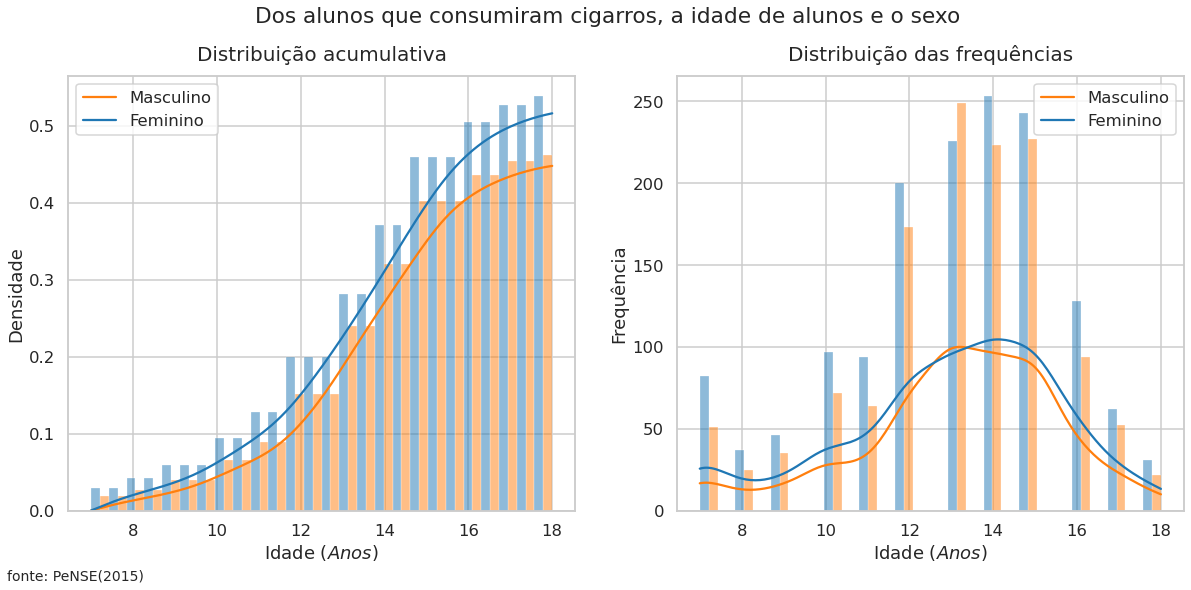

In [10]:
plt.subplot(1,2,1)
plt.text(5,-0.09,'fonte: PeNSE(2015)', fontsize=14)
plt.suptitle('Dos alunos que consumiram cigarros, a idade de alunos e o sexo',x=0.5, y=1)
ax = sns.histplot(data=consumiu_cigarro,x='idade_quando_experimentou_cigarro',
                  hue='sexo',kde=True, palette='tab10',
                  cumulative=True, stat='density',multiple="dodge", legend=True);
ax.set_title('Distribuição acumulativa',pad=15,fontsize=20)
ax.set_ylabel('Densidade', fontsize=18)
ax.set_xlabel(r'Idade $(Anos)$', fontsize=18)
ax.legend(sexo.values());

plt.subplot(1,2,2)
ax = sns.histplot(data=consumiu_cigarro,x='idade_quando_experimentou_cigarro',
                  hue='sexo', palette='tab10', kde=True, multiple="dodge", legend=False);
ax.set_title('Distribuição das frequências',pad=15,fontsize=20)
ax.set_ylabel('Frequência', fontsize=18)
ax.set_xlabel(r'Idade $(Anos)$', fontsize=18)
ax.legend(['Masculino','Feminino'])
ax.figure.set_size_inches(20,8)
plt.show()

#### Comentário sobre gráfico 1
> Visualmente os dados não se assemelham a nenhuma distribuição conhecida. Podemos realizar um teste de normalidade para ter uma fundamentação estatistica de que os dados não se distribuem normalmente. Dito isso, como os dados parecem não seguir uma distribuição canônica, o mais provável é aplicar um não paramétrico, tal que possa ser aplicado em variáveis quantitativas ordinais para verificar se estas amostras (alunos que já consumiram cigarro) provém da mesma distribuição. 


#### Aplicando o teste de Wilcoxon-Mann-Whitney para amostras de alunos de diferentes sexo que já usaram cigarro

O teste que será aplicado é o teste de Mann-Whitney, este teste serve para verificar se as duas amostras tem da mesma distribuição. Podemos aplicar teste teste para o caso de variáveis aleatórias qualitativas ordinais ou quantitativas segunddo [Portal Action: Teste de Wilcoxon-Mann-Whitney](http://www.portalaction.com.br/tecnicas-nao-parametricas/teste-de-wilcoxon-mann-whitney-amostras-independentes), é razoável considerar que as variáveis são independentes, pois a resposta do sexo masculino aparentemente não tem dependência com a resposta de uma amostra feminina.

As sendo $\mu$ a média amostral do consumo de cigarros, então as hipóteses consideradas para o teste Mann-Whitney são:

> $H_0: \text{ As duas amostras vêm da mesma distribuição } \Longleftrightarrow \mu_{masculino} = \mu_{feminino}$

> $H_1: \text{ As duas NÃO amostras vêm da mesma distribuição  } \Longleftrightarrow \mu_{masculino} \ne \mu_{feminino}$

> Se o $p$-valor $ < 0.05$, rejeita-se $H_0$.

Lembrando que o $p$-valor$<0.05$ indica que temos uma probabilidade de $5\%$ de cometer o erro de rejeitar a $H_0$ dado que ela é de fato verdadeira. Logo significa que temos um nível de confiança de $95\%$ de estarmos corretos.


Para mais informações sobre o teste consulte as fontes:
> MORETTIN, Pedro Alberto; BUSSAB, WILTON OLIVEIRA. **Estatística básica**. Saraiva Educação SA, 2017.

> https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html?highlight=mannwhitneyu#scipy.stats.mannwhitneyu

In [11]:
from scipy.stats import mannwhitneyu

meninos_consumiram_cigarro = consumiu_cigarro.query('sexo == 1')['idade_quando_experimentou_cigarro'].sample(1200,random_state=2021)
meninas_consumiram_cigarro = consumiu_cigarro.query('sexo == 2')['idade_quando_experimentou_cigarro'].sample(1200,random_state=2021)

_, pvalor =  mannwhitneyu(meninos_consumiram_cigarro, meninas_consumiram_cigarro,
                                     use_continuity=False, alternative='two-sided')
print(f'pvalor: {pvalor}\n')

if pvalor <= 0.05:
    print('Rejeita-se hipótese nula, as amostras não vem da mesma distribuição')
elif pvalor > 0.05:
    print('Não tem evidência estatistica para rejeitar hipótese nula, logo as amostras vêm da mesma distribuição')

pvalor: 0.24733895299931408

Não tem evidência estatistica para rejeitar hipótese nula, logo as amostras vêm da mesma distribuição


#### Comentário sobre a aplicação do Teste de Mann-Whitney para amostras que já experimentaram cigarro

> Tendo em vista o teste de Mann-Whitney, podemos afirmar com um nível de confiança de $95\%$, que não existe evidência estatistica para afirmar que as duas amostras vêm de distribuições diferentes. Portanto, sexo não é um fator que tem influência na idade em que se experimenta de cigarro. O que já era uma indicativo dado pelo coeficiente de correlação.

> Muito do consumo do cigarro começa na adolescencia, mas vale ressaltar que é importante diferenciar experimentação de consumo regular de cigarro. Um estudo relata que, durante os anos de 1999 e 2000, $48.5\%$ dos adolescentes norte americanos havia experimentado cigarro, mas somente $7.8\%$ era fumante regular [MOWERY, Paul D. et al. Progression to established smoking among US youths. American Journal of Public Health, v. 94, n. 2, p. 331-337, 2004.](https://ajph.aphapublications.org/doi/full/10.2105/AJPH.94.2.331).

> Dito isso o resultado de que não existe uma distinção entre sexos a respeito da idade em que ocorre a experimentação/consumo de cigarro em jovens, complementa o estudo Feito pelo [Observatório da Política Nacional de Controle do Tabaco](https://www.inca.gov.br/observatorio-da-politica-nacional-de-controle-do-tabaco/dados-e-numeros-prevalencia-tabagismo) que analisa a prevalência do tabagismo na população. Neste estudo conclui-se que a experimentação de cigarro para os meninos ($19,4\%$) foi superior quando comparado às meninas ($17,4\%$), entretanto a idade em que isto corre não é diferente.

### Trabalhando na segunda hipótese

2. Alunos que já consumiram álcool tem uma propenção maior de já terem consumido cigarro.

#### Medidas de tendência central e a variância das idades dos alunos que já consumiram álcool

Analisar preliminarmente as medidas de tendência central, disperção e percentis das idades permite se antecipar como estão distribuidos os dados. 

In [12]:
consumiu_bebida_alcoolica = dados_selecionados.query('usou_bebida_alcoolica == 1')
consumiu_bebida_alcoolica = consumiu_bebida_alcoolica.query('idade_quando_tomou_a_primeira_dose_de_bebida_alcoolica != -1 & idade_quando_tomou_a_primeira_dose_de_bebida_alcoolica != 99 & idade_quando_tomou_a_primeira_dose_de_bebida_alcoolica != 1')
consumiu_bebida_alcoolica = consumiu_bebida_alcoolica.query('usou_cigarro != 99')
consumiu_bebida_alcoolica.groupby('usou_cigarro')['idade_quando_tomou_a_primeira_dose_de_bebida_alcoolica'].describe().rename(index=usou_cigarro)

,count,mean,std,min,25%,50%,75%,max
usou_cigarro,,,,,,,,
Sim,2590.0,12.836680,2.353955,7.0,12.0,13.0,14.0,18.0
Não,4368.0,13.485119,2.191592,7.0,12.0,14.0,15.0,18.0


#### Gráfico 2: Dos alunos que já consumiram bebida alcoolica, quais já usaram cigarro ou não

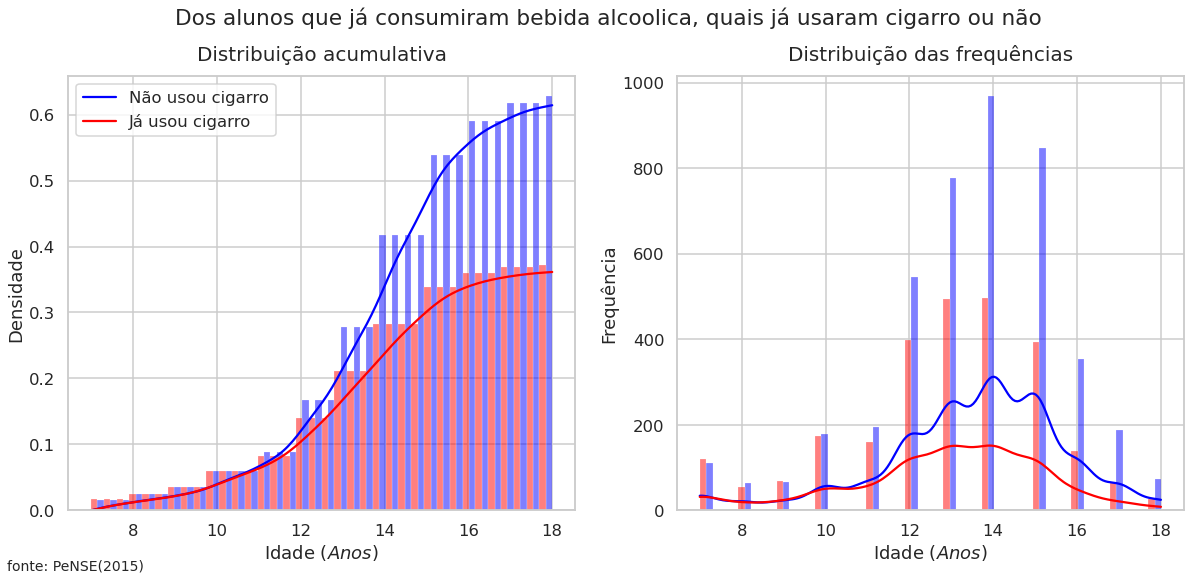

In [13]:
plt.subplot(1,2,1)
plt.suptitle('Dos alunos que já consumiram bebida alcoolica, quais já usaram cigarro ou não', x=0.5,y=1)
plt.text(5,-0.09,'fonte: PeNSE(2015)', fontsize=14)
ax = sns.histplot(data=consumiu_bebida_alcoolica,x='idade_quando_tomou_a_primeira_dose_de_bebida_alcoolica',
                  hue='usou_cigarro', palette=['red','blue'], kde=True,
                  cumulative=True, stat='density',multiple="dodge", legend=True);
ax.set_title('Distribuição acumulativa',pad=15,fontsize=20)
ax.set_ylabel('Densidade', fontsize=18)
ax.set_xlabel(r'Idade $(Anos)$', fontsize=18)
ax.legend(['Não usou cigarro','Já usou cigarro'])

plt.subplot(1,2,2)
ax = sns.histplot(data=consumiu_bebida_alcoolica,x='idade_quando_tomou_a_primeira_dose_de_bebida_alcoolica',
                  hue='usou_cigarro', palette=['red','blue'], kde=True, multiple="dodge", legend=False);
ax.set_title('Distribuição das frequências',pad=15,fontsize=20)
ax.set_ylabel('Frequência', fontsize=18)
ax.set_xlabel(r'Idade $(Anos)$', fontsize=18)
ax.figure.set_size_inches(20,8)
plt.show()

#### Comentário sobre gráfico 2

> Na figura acima podemos notar no grafico que ilustra distribuição acumulativa das idades, à esquerda, que existe uma diferença dentre os alunos que já consumiram álcool se já usaram cigarro ou não. **A maioria dos alunos que já consumiu álcool não fez uso de cigarro** e isso fica ainda mais fácil de se verificar no histograma à direita. O histograma que representa distribuição de frequências dos alunos que já consumiram álcool separados por quem já usou e não usou cigarro. 


#### teste de Wilcoxon-Mann-Whitney para amostras de alunos que já consumiram bebida alcoolica

Aqui realizaremos a princípio um teste bicaudal não paramétrico de Wilcoxon-Mann-Whitney, afim de comparar se as amostras provém da mesma distribuição. A importancia de verificar se as amostras vêm da mesma distribuição é que desta forma podemos afirmar ou não que suas estatisticas (media, variância, desvio padrão e curtose) são iguais.

Sendo $\mu$ a média da idade em que as amostras consumiram alcool, $\mu_{CC}$ a média das idades das amostras que consumiram alcool e consumiram cigarro e $\mu_{NCC}$ as amostras que consumiram alcool e **não** consumiram cigarro, então serão testas as seguintes hipóteses:

> $H_0: \text{ As duas amostras vêm da mesma distribuição } \Longleftrightarrow \mu_{\text{CC}} = \mu_{\text{NCC}}$

> $H_1: \text{ As duas NÃO amostras vêm da mesma distribuição  } \Longleftrightarrow \mu_{\text{CC}} \ne \mu_{\text{NCC}}$

> Se o $p$-valor $< 0.05$, rejeita-se $H_0$

In [14]:
from scipy.stats import mannwhitneyu

usaram_alcool_e_consumiram_cigarro = consumiu_bebida_alcoolica.query('usou_cigarro == 1')['idade_quando_experimentou_cigarro'].sample(1200,random_state=2021)
usaram_alcool_e_nao_consumiram_cigarro = consumiu_bebida_alcoolica.query('usou_cigarro == 2')['idade_quando_experimentou_cigarro'].sample(1200,random_state=2021)

_, pvalor =  mannwhitneyu(usaram_alcool_e_consumiram_cigarro, usaram_alcool_e_nao_consumiram_cigarro,
                                     use_continuity=False, alternative='two-sided')
print(f'pvalor: {pvalor}\n')

if pvalor <= 0.05:
    print('Rejeita-se hipótese nula, as amostras não vem da mesma distribuição')
elif pvalor > 0.05:
    print('Não tem evidência estatistica para rejeitar hipótese nula, logo as amostras vêm da mesma distribuição')

pvalor: 0.0

Rejeita-se hipótese nula, as amostras não vem da mesma distribuição


#### Comentário sobre a aplicação do Teste de Mann-Whitney para amostras que já consumiram alcool

> Dado o resultado do teste estatistico podemos consluir que as amostras provém de distribuições diferentes. Isso significa que as estatisticas media, variancia, desvio padrão e curtose são diferentes. Já era possível verificar que as estatisticas são diferentes, principalmente o curtose (achatamento da distribuição). 

> Tendo em vista a conclusão de que as distribuções são diferentes podemos realizar outro teste agora unicaudal, pra verificar qual distribuição de frequências é maior. Para isso o tipo de teste que será realizado é basicamente o mesmo com a ressalva de que a hipótese nula é de que da amostra dos alunos que consumiram cigarro é maior do que os que não consumiram.

#### teste de Wilcoxon-Mann-Whitney para comparação qual amostra é maior

Aqui vamos propor um teste em que a hipótese nula é que a médias das idades das amostras de alunos que consumiram bebida alcoolica e cigarro é maior do que as amostras que não consumiram. Pode parecer esquisito, mas em teste estatisticos o objetivo é sempre tentar refutar a hipótese nula, temos então a formalização das hipóteses:


> $H_0: \text{ As duas amostras vêm da mesma distribuição } \Longleftrightarrow \mu_{\text{CC}} \ge \mu_{\text{NCC}}$

> $H_1: \text{ As duas NÃO amostras vêm da mesma distribuição  } \Longleftrightarrow \mu_{\text{CC}} < \mu_{\text{NCC}}$

> Se o $p$-valor $< 0.05$, rejeita-se $H_0$

In [15]:
from scipy.stats import mannwhitneyu

usaram_alcool_e_consumiram_cigarro = consumiu_bebida_alcoolica.query('usou_cigarro == 1')['idade_quando_experimentou_cigarro'].sample(1200,random_state=2021)
usaram_alcool_e_nao_consumiram_cigarro = consumiu_bebida_alcoolica.query('usou_cigarro == 2')['idade_quando_experimentou_cigarro'].sample(1200,random_state=2021)

_, pvalor =  mannwhitneyu(usaram_alcool_e_consumiram_cigarro, usaram_alcool_e_nao_consumiram_cigarro,
                                     use_continuity=False, alternative='greater')
print(f'pvalor: {pvalor}\n')

if pvalor <= 0.05:
    print('Rejeita-se hipótese nula')
elif pvalor > 0.05:
    print('Não tem evidência estatistica para rejeitar hipótese nula')

pvalor: 0.0

Rejeita-se hipótese nula


#### comentário sobre teste de Wilcoxon-Mann-Whitney para comparação qual amostra é maior:

> Tendo postas as hipóteses e o $p$*-valor*$<0.05$ temos uma confiança de $95\%$ de que a idade média dos alunos que ja consumiram alcool e não consumiram cigarro é maior do que a idade dos alunos que consumiram alcool e não consumiram o cigarro. Ou seja, a idade média das pessoas que já beberam alcoól e não consumiram cigarro é maior do que a idade média das pessoas já consumiram as duas drogas lícitas.


# Conclusão

A respeito da amostra das idades em que os alunos já consumiram cigarro foi possível verificar que não existe diferença estatistica entre as idades dos alunos do sexo feminino e masculino que afirmaram já ter consumido cigarro. A partir disso é possível afirmar que independente do sexo a idade média em que os alunos já consumiram cigarro é a mesma. 

Para a amostra dos alunos que já consumiram álcool, foi possível verificar que a quantidade de alunos que já consumiu álcool mas não consumiu cigarro é maior do que a quantidade de alunos que já consumiram as duas drogas lícitas. 

# Referências

1. INSTITUTO BRASILEIRO DE GEOGRAFIA E ESTATISTICA (IBGE), [PeNSE 2015](https://www.ibge.gov.br/estatisticas/sociais/educacao/9134-pesquisa-nacional-de-saude-do-escolar.html?=&t=microdados)

2.  MORETTIN, Pedro Alberto; BUSSAB, WILTON OLIVEIRA. **Estatística básica**. Saraiva Educação SA, 2017.

3. MOWERY, Paul D. et al. [Progression to established smoking among US youths]((https://ajph.aphapublications.org/doi/full/10.2105/AJPH.94.2.331)). American Journal of Public Health, v. 94, n. 2, p. 331-337, 2004.

4. Instituto Nacional do Cancer, Observatório da Política Nacional de Controle do Tabaco -[ Dados e números da prevalência do tabagismo](https://www.inca.gov.br/observatorio-da-politica-nacional-de-controle-do-tabaco/dados-e-numeros-prevalencia-tabagismo)